# Neural Network Models for Object Recognition

**Machine learning project**

Ana Sousa Gerós
March 2025

# Initial setup

In [ ]:
# general library import
import os
import numpy as np
import pandas as pd
import itertools
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from datetime import datetime

# random seed generators
from numpy.random import seed
seed(888)
tf.random.set_seed(112)

# load dataset
from keras.datasets import cifar10 # importing the dataset

# modelling functions
from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
from keras.applications.vgg19 import VGG19,preprocess_input

# image viewing
from IPython.display import display
from keras.preprocessing.image import array_to_img

# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# buzzer when code finishes
from google.colab import output
def buzzer():
  output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/pronunciation/2019-10-21/audio/do/done_en_us_1.mp3").play()')


In [ ]:
# transforming dataset into dataframe

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
# creating list with labels

LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



# Dataset exploration

## Investigate images

In [ ]:
print(x_train_all.shape)

print(x_train_all)

(50000, 32, 32, 3)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  

50000 elements, 32x32 pixel images, each pixel has 3 values (RGB channels) ranging from 0-255

The structure is:
[image
  [column
    [row
      [pixel]
      ]
]

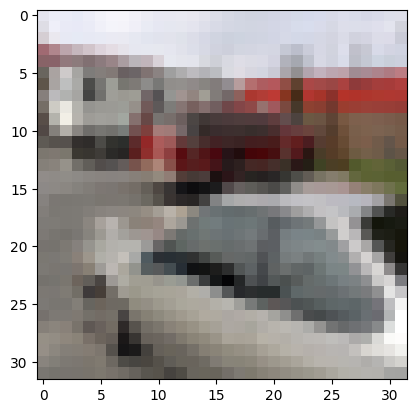

In [ ]:
# investigate an individual image
plt.imshow(x_train_all[49999])



In [ ]:
x_train_all[49999].shape

(32, 32, 3)

In [ ]:
# checking test images

number_of_images, x, y, c = x_test.shape
print(f'Number of images (test set) = {number_of_images}\nWidth = {x} pixels\nHeight = {y} pixels\nChannels = {c}')

Number of images (test set) = 10000
Width = 32 pixels
Height = 32 pixels
Channels = 3


## Investigate labels

In [ ]:
# general shape
y_train_all.shape

(50000, 1)

In [ ]:
# investigate label for a single image
y_train_all[49999][0]

1

In [ ]:
# matching with label names
LABEL_NAMES[y_train_all[49999][0]]

'automobile'

# Preprocessing

## Scalling pixel values

In [ ]:
x_train_all =x_train_all / 255.0
x_test =  x_test / 255.0

In [ ]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

## Creating validation set



Original dataset already split 50000:10000 into train and test data.  
Validation split could be performed with cross-validation (k-fold, LOOCV) or train-validation split. In this case, given the very large amount of instances in the dataset, we can choose a train-validation split without worrying too much about the impact of the initial split (but can verify this further).   

No clear rule as to how to split into train and validation set. Given the large amount of data, an 80/20 split (40000:10000) should be appropriate.

In [ ]:
# creating the validation set
VALIDATION_SIZE = 10000

x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
print("Image validation set shape:\n", x_val.shape)
print("Labels validation set shape:\n", y_val.shape)

Image validation set shape:
 (10000, 32, 32, 3)
Labels validation set shape:
 (10000, 1)


In [ ]:
# removing validation set instances from training set
x_train = x_train_all[VALIDATION_SIZE:]
y_train= y_train_all[VALIDATION_SIZE:]
print("Image training set shape:\n", x_train.shape)
print("Labels training set shape:\n", y_train.shape)

Image training set shape:
 (40000, 32, 32, 3)
Labels training set shape:
 (40000, 1)


# Building model

## Defining early stopping rule

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Baseline model (training materials) - SGD optimizer

In [ ]:
model_1 = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER
model_1.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_1.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************

# *************CONVOLUTIONAL LAYER
model_1.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_1.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model_1.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model_1.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_1.add(Dense(10, activation='softmax'))


model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting model

In [ ]:
start = datetime.now()
history_model_1 = model_1.fit(x_train,
                                 y_train,
                    epochs=50, # number of epochs
                    batch_size=64, # batch size
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1583 - loss: 2.2371 - val_accuracy: 0.2718 - val_loss: 1.9852
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3058 - loss: 1.9283 - val_accuracy: 0.3528 - val_loss: 1.7943
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3719 - loss: 1.7585 - val_accuracy: 0.4098 - val_loss: 1.6359
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4167 - loss: 1.6262 - val_accuracy: 0.4466 - val_loss: 1.5300
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4447 - loss: 1.5432 - val_accuracy: 0.4726 - val_loss: 1.4671
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4673 - loss: 1.4845 - val_accuracy: 0.4913 - val_loss: 1.4194
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4869 - loss: 1.4365 - val_accuracy: 0.5068 - val_loss: 1.3805
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5034 - loss: 1.3943 - val_accuracy: 0.

### Checking model training metrics

In [ ]:
metrics_model_1 = pd.DataFrame(model_1.history.history)
metrics_model_1

,accuracy,loss,val_accuracy,val_loss
0,0.202525,2.145624,0.2718,1.985183
1,0.321150,1.886687,0.3528,1.794304
2,0.383700,1.723804,0.4098,1.635853
3,0.424075,1.603219,0.4466,1.530032
4,0.451100,1.526580,0.4726,1.467087
5,0.472475,1.469995,0.4913,1.419449
6,0.492050,1.422721,0.5068,1.380473
7,0.508075,1.380870,0.5210,1.346616
8,0.523850,1.343125,0.5334,1.315192
9,0.538025,1.308555,0.5428,1.288851


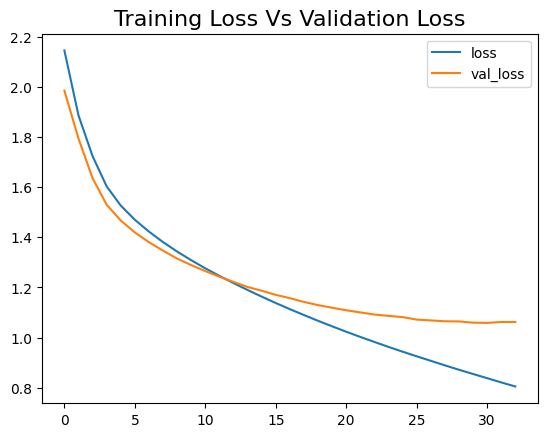

In [ ]:
metrics_model_1[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

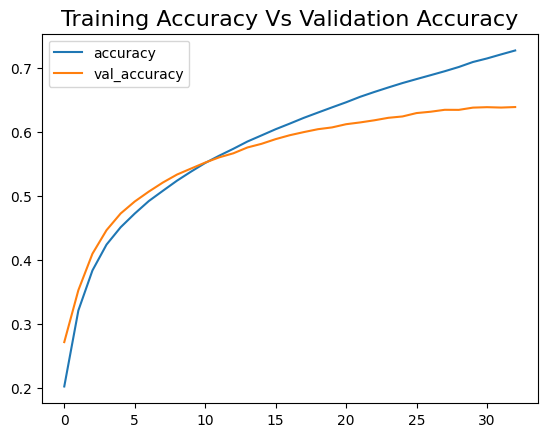

In [ ]:
metrics_model_1[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Baseline model (training materials) - Adam optimizer

In [ ]:
model_2 = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER
model_2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_2.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************

# *************CONVOLUTIONAL LAYER
model_2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_2.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model_2.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model_2.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_2.add(Dense(10, activation='softmax'))


model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
start = datetime.now()
history_model_2 = model_2.fit(x_train,
                                 y_train,
                    epochs=50, # number of epochs
                    batch_size=64, # batch size
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3419 - loss: 1.8018 - val_accuracy: 0.5001 - val_loss: 1.3818
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5380 - loss: 1.3001 - val_accuracy: 0.5818 - val_loss: 1.1832
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6005 - loss: 1.1355 - val_accuracy: 0.6186 - val_loss: 1.0845
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6408 - loss: 1.0246 - val_accuracy: 0.6315 - val_loss: 1.0650
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6726 - loss: 0.9325 - val_accuracy: 0.6357 - val_loss: 1.0440
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6995 - loss: 0.8598 - val_accuracy: 0.6460 - val_loss: 1.0307
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7263 - loss: 0.7907 - val_accuracy: 0.6564 - val_loss: 1.0179
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.7265 - val_accuracy: 0.

### Checking model training metrics

In [ ]:
metrics_model_2 = pd.DataFrame(model_2.history.history)
metrics_model_2

,accuracy,loss,val_accuracy,val_loss
0,0.426775,1.585744,0.5001,1.381804
1,0.559025,1.245304,0.5818,1.183189
2,0.613075,1.099781,0.6186,1.084457
3,0.650350,0.996652,0.6315,1.065022
4,0.682925,0.907494,0.6357,1.043971
5,0.707425,0.836388,0.6460,1.030675
6,0.734450,0.768598,0.6564,1.017902
7,0.755450,0.706603,0.6493,1.063826
8,0.775425,0.647048,0.6372,1.153905


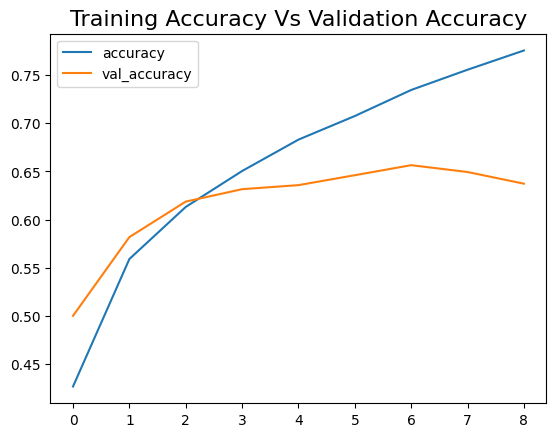

In [ ]:
metrics_model_2[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

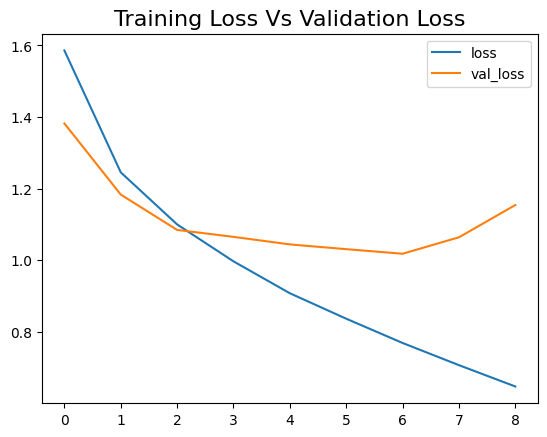

In [ ]:
metrics_model_2[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

## VGG-19

### Load base model

In [ ]:
# loading VGG-19 model

vgg = VGG19( include_top = False,
            input_shape = [32,32,3],
            # weights='imagenet'
            )

vgg.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

## VGG-19 model - SGD optimizer

In [ ]:
del(model_3)

In [ ]:
model_3=Sequential(vgg.layers)

# flatting layer

model_3.add(Flatten())

# ANN layers

# dense layers
model_3.add(Dense(4096,  # number of neurons in dense layer
                activation='relu')) # activation function

model_3.add(Dense(4096,  # number of neurons in dense layer
                activation='relu')) # activation function

# final classifier
model_3.add(Dense(10,  # 10 classes
                activation='softmax')) # activation function

# model configuration (training parameters - loss, optimizer, target metric)
model_3.compile(loss='sparse_categorical_crossentropy', # sparse categorical crossentropy, suitable for multiclass classification tasks (with integer encoded targets)
              optimizer='sgd', # optimizer function
              metrics=['accuracy'])



In [ ]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 38,947,914 (148.57 MB)

 Trainable params: 38,947,914 (148.57 MB)

 Non-trainable params: 0 (0.00 B)

### Fitting model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
start = datetime.now()
history_model_3 = model_3.fit(x_train, y_train,
                    epochs=50, # number of epochs,
                    batch_size=64,
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4064 - loss: 1.6823 - val_accuracy: 0.7246 - val_loss: 0.7924
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7215 - loss: 0.8111 - val_accuracy: 0.7636 - val_loss: 0.6890
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7919 - loss: 0.6110 - val_accuracy: 0.7929 - val_loss: 0.5987
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8317 - loss: 0.4971 - val_accuracy: 0.7846 - val_loss: 0.6447
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8623 - loss: 0.4099 - val_accuracy: 0.7533 - val_loss: 0.8358
Total elapsed time :  0:00:32.698796


### Checking model training metrics

In [ ]:
metrics_model_3 = pd.DataFrame(model_3.history.history)
metrics_model_3

,accuracy,loss,val_accuracy,val_loss
0,0.541825,1.312372,0.7246,0.792411
1,0.741275,0.750850,0.7636,0.689007
2,0.801250,0.579588,0.7929,0.598740
3,0.838525,0.473599,0.7846,0.644745
4,0.868650,0.389554,0.7533,0.835764


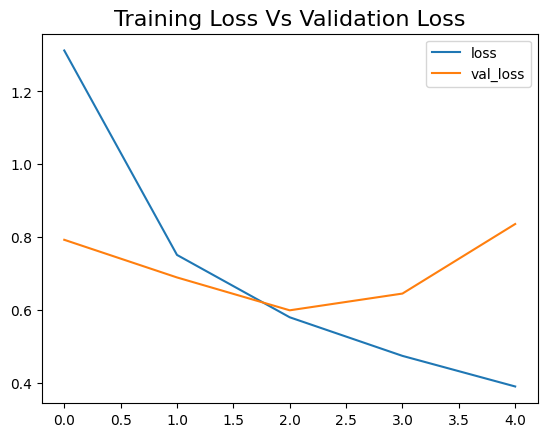

In [ ]:
metrics_model_3[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

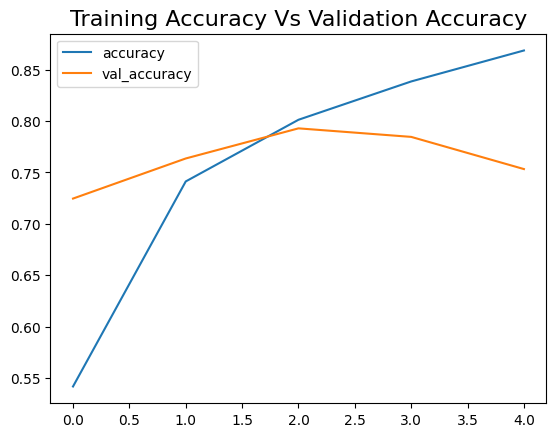

In [ ]:
metrics_model_3[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()



## VGG-19 model - Adam optimizer

In [ ]:
del(model_4)

In [ ]:
vgg = VGG19( include_top = False,
            input_shape = [32,32,3],
            # weights='imagenet'
            )

model_4=Sequential(vgg.layers)

# flatting layer

model_4.add(Flatten())

# ANN layers

# dense layers
model_4.add(Dense(4096,  # number of neurons in dense layer
                activation='relu')) # activation function

model_4.add(Dense(4096,  # number of neurons in dense layer
                activation='relu')) # activation function

# final classifier
model_4.add(Dense(10,  # 10 classes
                activation='softmax')) # activation function

# model configuration (training parameters - loss, optimizer, target metric)
model_4.compile(loss='sparse_categorical_crossentropy', # sparse categorical crossentropy, suitable for multiclass classification tasks (with integer encoded targets)
              optimizer='adam', # optimizer function
              metrics=['accuracy'])



In [ ]:
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 38,947,914 (148.57 MB)

 Trainable params: 38,947,914 (148.57 MB)

 Non-trainable params: 0 (0.00 B)

### Fitting model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
start = datetime.now()
history_model_4 = model_4.fit(x_train, y_train,
                    epochs=50, # number of epochs,
                    batch_size=64,
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.1010 - loss: 2.4378 - val_accuracy: 0.0999 - val_loss: 2.3027
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0962 - loss: 2.3030 - val_accuracy: 0.0999 - val_loss: 2.3027
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0958 - loss: 2.3028 - val_accuracy: 0.0999 - val_loss: 2.3027
Total elapsed time :  0:00:30.802084


### Checking model training metrics

In [ ]:
metrics_model_4 = pd.DataFrame(model_4.history.history)
metrics_model_4

,accuracy,loss,val_accuracy,val_loss
0,0.100550,2.499209,0.0999,2.302709
1,0.097800,2.302745,0.0999,2.302745
2,0.099075,2.302723,0.0999,2.302764


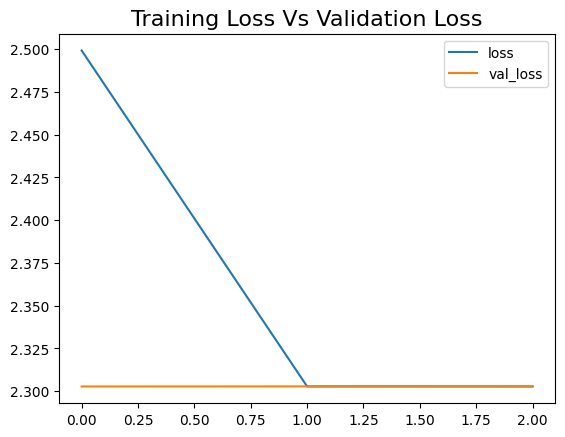

In [ ]:
metrics_model_4[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

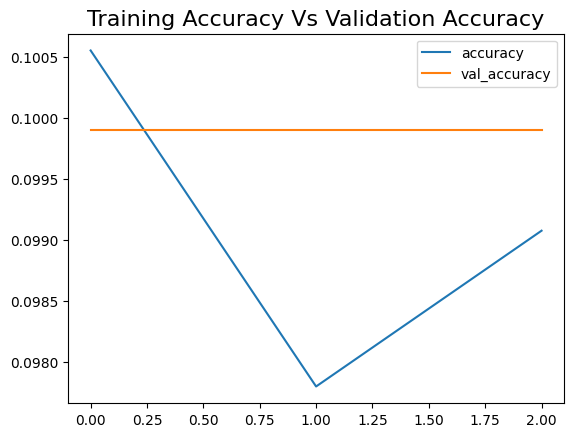

In [ ]:
metrics_model_4[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## VGG-19 model - Adam optimizer (changed learning rate)

In [ ]:

# Freeze all VGG layers
# for layer in vgg.layers:
#    layer.trainable = False

model_5 = Sequential(vgg.layers)


# Flatten and add  dense layers

model_5.add(Flatten())
model_5.add(Dense(4096,  activation='relu'))
model_5.add(Dense(4096,  activation='relu'))
model_5.add(Dense(10,  activation='softmax'))




# Flatten and add custom dense layers
# model_5.add(Flatten())
# model_5.add(Dense(1024, activation='relu'))
# model_5.add(Dropout(0.5))
# model_5.add(Dense(512, activation='relu'))
# model_5.add(Dropout(0.5))
# model_5.add(Dense(10, activation='softmax'))

# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_5.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_5 = model_5.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9002 - loss: 0.3342 - val_accuracy: 0.8285 - val_loss: 0.5695
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9164 - loss: 0.2557 - val_accuracy: 0.8287 - val_loss: 0.5998
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9390 - loss: 0.1853 - val_accuracy: 0.8192 - val_loss: 0.6643
Total elapsed time: 0:00:28.303739


### Checking model training metrics

In [ ]:
metrics_model_5 = pd.DataFrame(model_5.history.history)
metrics_model_5

,accuracy,loss,val_accuracy,val_loss
0,0.908300,0.291528,0.8285,0.569452
1,0.918575,0.249655,0.8287,0.599762
2,0.937650,0.188845,0.8192,0.664257


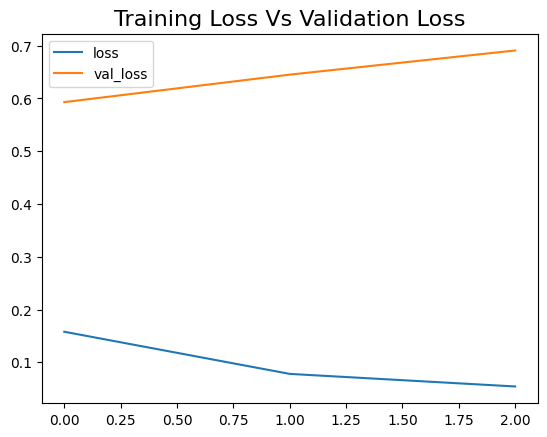

In [ ]:
metrics_model_5[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

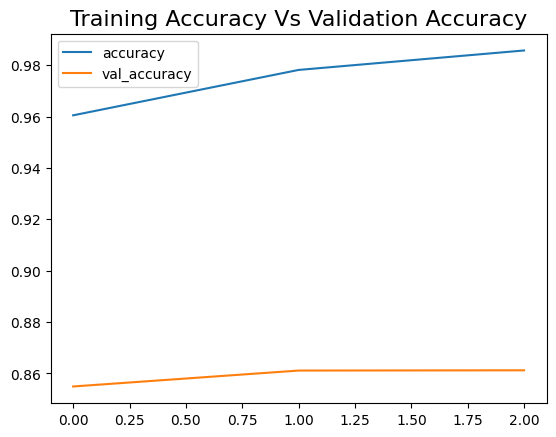

In [ ]:
metrics_model_5[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## VGG-19 model - Adam optimizer (batch normalisation)

In [ ]:

# Freeze all VGG layers
# for layer in vgg.layers:
#    layer.trainable = False

model_6 = Sequential(vgg.layers)


# Flatten and add dense layers + batch normalisation

model_6.add(Flatten())
model_6.add(Dense(4096,  activation='relu'))
model_6.add(BatchNormalization())
model_6.add(Dense(4096,  activation='relu'))
model_6.add(BatchNormalization())
model_6.add(Dense(10,  activation='softmax'))




# Flatten and add custom dense layers
# model_5.add(Flatten())
# model_5.add(Dense(1024, activation='relu'))
# model_5.add(Dropout(0.5))
# model_5.add(Dense(512, activation='relu'))
# model_5.add(Dropout(0.5))
# model_5.add(Dense(10, activation='softmax'))

# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_6.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_6 = model_6.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9264 - loss: 0.3089 - val_accuracy: 0.8020 - val_loss: 0.8578
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9549 - loss: 0.1476 - val_accuracy: 0.7964 - val_loss: 0.9903
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9611 - loss: 0.1239 - val_accuracy: 0.8184 - val_loss: 0.8317
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9676 - loss: 0.1032 - val_accuracy: 0.8169 - val_loss: 0.8983
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9699 - loss: 0.0959 - val_accuracy: 0.7890 - val_loss: 1.0675
Total elapsed time: 0:00:44.478848


### Checking model training metrics

In [ ]:
metrics_model_6 = pd.DataFrame(model_6.history.history)
metrics_model_6

,accuracy,loss,val_accuracy,val_loss
0,0.943725,0.213584,0.8020,0.857794
1,0.957875,0.135923,0.7964,0.990321
2,0.963625,0.111848,0.8184,0.831689
3,0.970025,0.095517,0.8169,0.898287
4,0.971050,0.089650,0.7890,1.067495


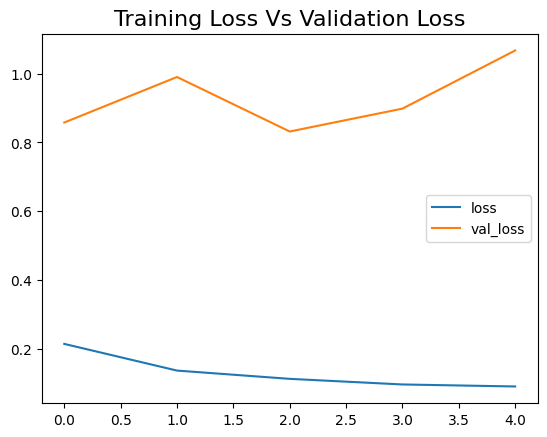

In [ ]:
metrics_model_6[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

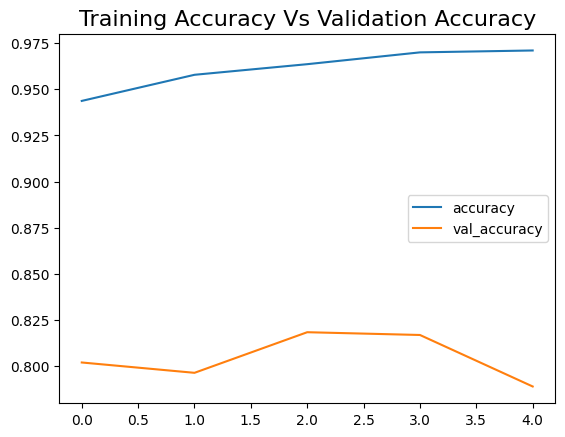

In [ ]:
metrics_model_6[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## VGG-19 model - Adam optimizer (dropout)

In [ ]:

# Freeze all VGG layers
# for layer in vgg.layers:
#    layer.trainable = False

model_7 = Sequential(vgg.layers)


# Flatten and add dense layers + batch normalisation + dropout

model_7.add(Flatten())
model_7.add(Dense(4096,  activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5)) # discard 50% of neurons
model_7.add(Dense(4096,  activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5)) # discard 50% of neurons
model_7.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_7.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_7 = model_7.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9459 - loss: 0.2071 - val_accuracy: 0.8124 - val_loss: 0.9550
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9662 - loss: 0.1106 - val_accuracy: 0.8249 - val_loss: 0.9273
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9739 - loss: 0.0899 - val_accuracy: 0.8272 - val_loss: 0.8628
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9778 - loss: 0.0740 - val_accuracy: 0.8369 - val_loss: 0.8488
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9801 - loss: 0.0671 - val_accuracy: 0.8247 - val_loss: 0.8369
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9771 - loss: 0.0765 - val_accuracy: 0.8254 - val_loss: 0.8666
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9815 - loss: 0.0590 - val_accuracy: 0.8398 - val_loss: 0.7325
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9852 - loss: 0.0495 - val_acc

### Checking model training metrics

In [ ]:
metrics_model_7 = pd.DataFrame(model_7.history.history)
metrics_model_7

,accuracy,loss,val_accuracy,val_loss
0,0.961050,0.145476,0.8124,0.954991
1,0.967700,0.108327,0.8249,0.927304
2,0.973025,0.089731,0.8272,0.862764
3,0.977275,0.078255,0.8369,0.848847
4,0.978400,0.071917,0.8247,0.836879
5,0.977500,0.073728,0.8254,0.866585
6,0.982100,0.058861,0.8398,0.732463
7,0.983175,0.056988,0.8244,0.850643
8,0.981950,0.060887,0.8184,0.952146


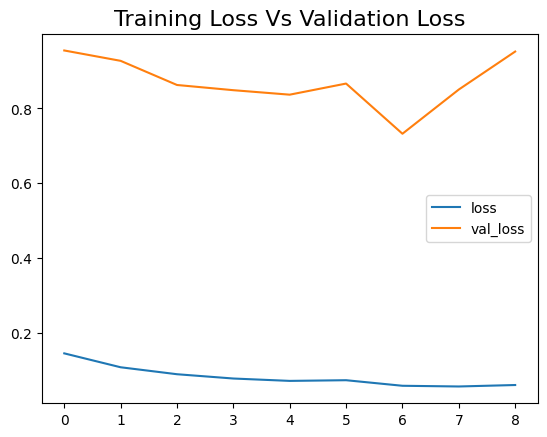

In [ ]:
metrics_model_7[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

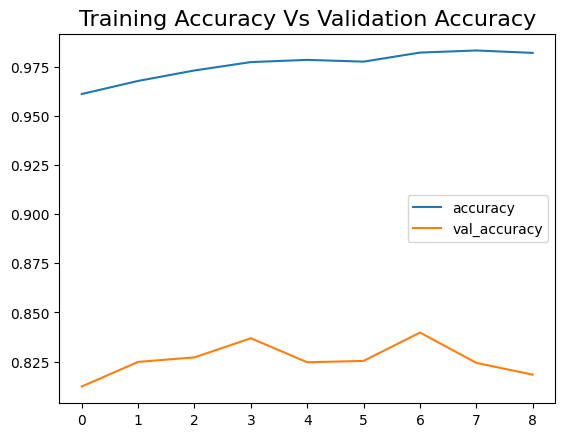

In [ ]:
metrics_model_7[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## VGG-19 model - Adam optimizer (trim dense layers, remove dropout)

In [ ]:
del(model_8)

In [ ]:

# Freeze all VGG layers
# for layer in vgg.layers:
#    layer.trainable = False

model_8 = Sequential(vgg.layers)


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers

model_8.add(Flatten())
model_8.add(Dense(1024,  activation='relu'))
model_8.add(BatchNormalization())
# model_8.add(Dropout(0.5)) # discard 50% of neurons
model_8.add(Dense(512,  activation='relu'))
model_8.add(BatchNormalization())
# model_8.add(Dropout(0.5)) # discard 50% of neurons
model_8.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_8.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_8 = model_8.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9660 - loss: 0.1127 - val_accuracy: 0.8374 - val_loss: 0.8496
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.8155 - val_loss: 0.9429
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9857 - loss: 0.0477 - val_accuracy: 0.8409 - val_loss: 0.7568
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.8370 - val_loss: 0.8287
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9904 - loss: 0.0328 - val_accuracy: 0.8357 - val_loss: 0.8737
Total elapsed time: 0:00:41.504467


### Checking model training metrics

In [ ]:
metrics_model_8 = pd.DataFrame(model_8.history.history)
metrics_model_8

,accuracy,loss,val_accuracy,val_loss
0,0.980375,0.063460,0.8374,0.849573
1,0.987300,0.043969,0.8155,0.942917
2,0.987050,0.043412,0.8409,0.756775
3,0.988850,0.034007,0.8370,0.828700
4,0.990050,0.034072,0.8357,0.873694


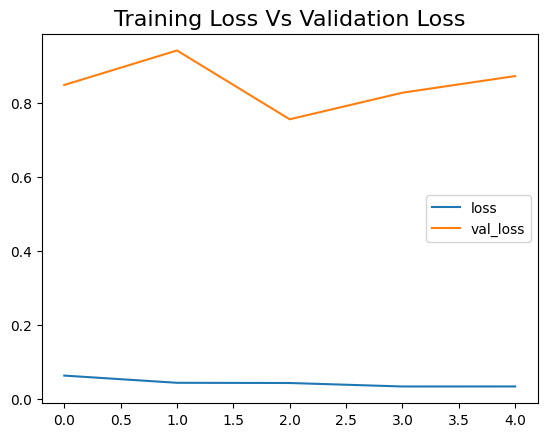

In [ ]:
metrics_model_8[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

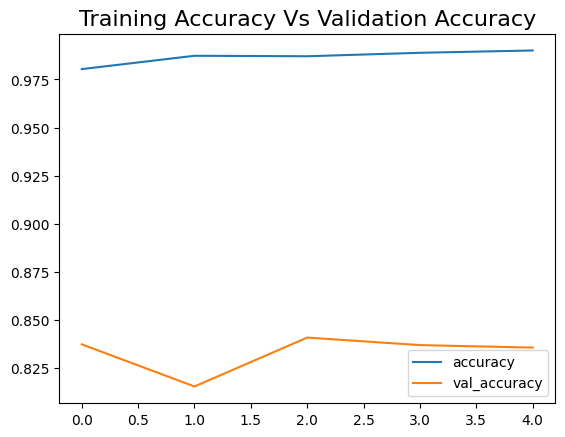

In [ ]:
metrics_model_8[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## VGG-19 model - Adam optimizer (trim dense layers, with dropout)

In [ ]:


model_9 = Sequential(vgg.layers)


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers

model_9.add(Flatten())
model_9.add(Dense(1024,  activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.5)) # discard 50% of neurons
model_9.add(Dense(512,  activation='relu'))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.5)) # discard 50% of neurons
model_9.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_9.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_9 = model_9.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9317 - loss: 0.2353 - val_accuracy: 0.8434 - val_loss: 0.8764
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9862 - loss: 0.0476 - val_accuracy: 0.8437 - val_loss: 0.8902
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9890 - loss: 0.0428 - val_accuracy: 0.8476 - val_loss: 0.8141
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9886 - loss: 0.0398 - val_accuracy: 0.8402 - val_loss: 0.8865
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9868 - loss: 0.0456 - val_accuracy: 0.8438 - val_loss: 0.8966
Total elapsed time: 0:00:41.797212


### Checking model training metrics

In [ ]:
metrics_model_9 = pd.DataFrame(model_9.history.history)
metrics_model_9

,accuracy,loss,val_accuracy,val_loss
0,0.973750,0.094775,0.8434,0.876441
1,0.987825,0.043589,0.8437,0.890243
2,0.988275,0.043924,0.8476,0.814130
3,0.988125,0.041827,0.8402,0.886450
4,0.988475,0.040523,0.8438,0.896566


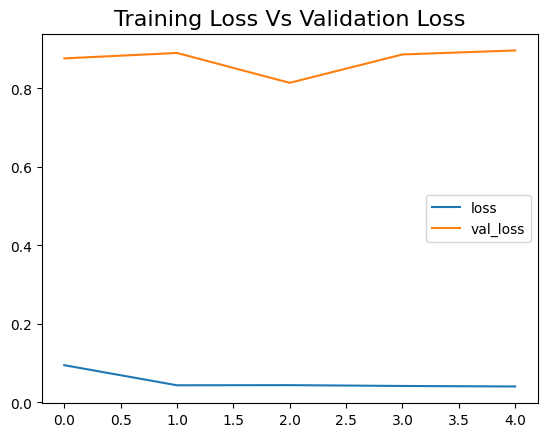

In [ ]:
metrics_model_9[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

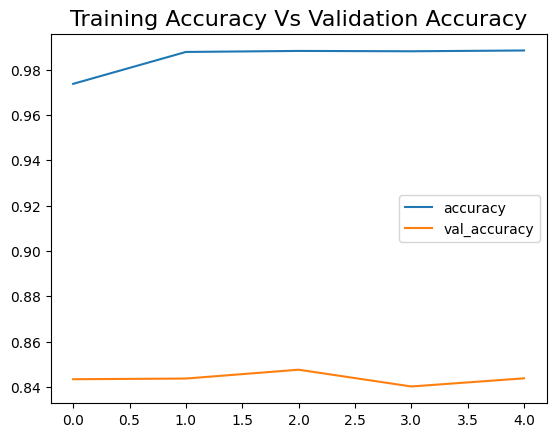

In [ ]:
metrics_model_9[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Transfer learning (pre-trained model)

### Reload VGG model with weights

In [ ]:
vgg_pre_trained = VGG19( include_top = False,
            input_shape = [32,32,3],
            weights='imagenet'
            )

In [ ]:

# Freeze all VGG layers
for layer in vgg_pre_trained.layers:
   layer.trainable = False

model_10 = Sequential(vgg_pre_trained.layers)


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers

model_10.add(Flatten())
model_10.add(Dense(1024,  activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.5)) # discard 50% of neurons
model_10.add(Dense(512,  activation='relu'))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.5)) # discard 50% of neurons
model_10.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_10.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


In [ ]:
model_10.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,085,770 (80.44 MB)

 Trainable params: 1,058,314 (4.04 MB)

 Non-trainable params: 20,027,456 (76.40 MB)

### Fitting model

In [ ]:

early_stop = EarlyStopping(monitor='val_loss', patience=2)
start = datetime.now()
history_model_10 = model_10.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

duration = datetime.now() - start
print('Total elapsed time:', duration)
buzzer()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2761 - loss: 2.6108 - val_accuracy: 0.5196 - val_loss: 1.4120
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4174 - loss: 1.9125 - val_accuracy: 0.5527 - val_loss: 1.3182
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4467 - loss: 1.7168 - val_accuracy: 0.5602 - val_loss: 1.2669
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4718 - loss: 1.6022 - val_accuracy: 0.5719 - val_loss: 1.2314
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4943 - loss: 1.4954 - val_accuracy: 0.5773 - val_loss: 1.2100
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5091 - loss: 1.4395 - val_accuracy: 0.5825 - val_loss: 1.1943
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5241 - loss: 1.3867 - val_accuracy: 0.5906 - val_loss: 1.1792
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5306 - loss: 1.3384 - val_accuracy: 0.

### Checking model training metrics

In [ ]:
metrics_model_10 = pd.DataFrame(model_10.history.history)
metrics_model_10

,accuracy,loss,val_accuracy,val_loss
0,0.337775,2.292621,0.5196,1.411963
1,0.421950,1.863356,0.5527,1.318233
2,0.452525,1.686836,0.5602,1.266851
3,0.476300,1.580666,0.5719,1.231443
4,0.496100,1.488023,0.5773,1.210009
5,0.510000,1.429555,0.5825,1.194286
6,0.525700,1.378217,0.5906,1.179150
7,0.532125,1.334097,0.5939,1.165777
8,0.545625,1.300294,0.5943,1.158493
9,0.556825,1.268864,0.5999,1.151955


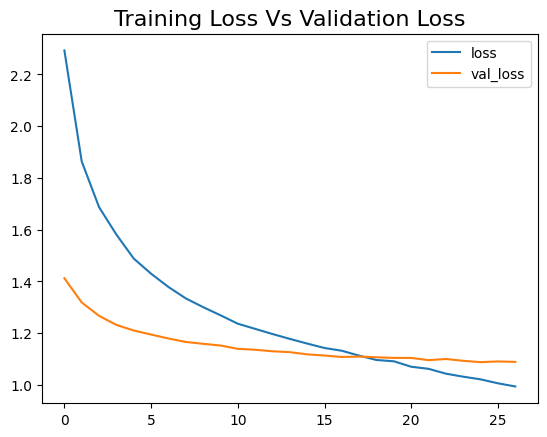

In [ ]:
metrics_model_10[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

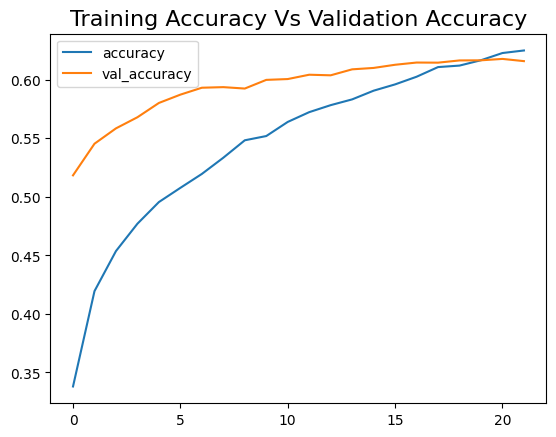

In [ ]:
metrics_model_10[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Data augmentation



### Generate augmented images

In [ ]:
# data augmentation with random transformations (rotation, shifts, zoom, flip, shear)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True ,
    fill_mode = 'nearest'
)

datagen.fit(x_train_all)

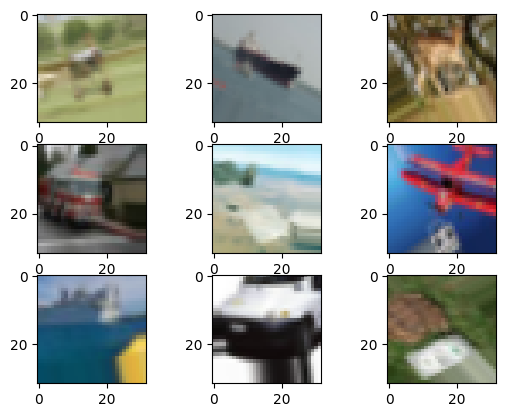

In [ ]:
# checking augmented images

for X_batch, y_batch in datagen.flow(x_train_all,
                                     y_train_all,
                                     batch_size=10, # number of images generated per batch
                                     seed=30): # random seed
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

### Specify model

In [ ]:
del(model_11)

In [ ]:


model_11 = Sequential(vgg.layers) # same as model 9


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers + dropout

model_11.add(Flatten())
model_11.add(Dense(1024,  activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.5)) # discard 50% of neurons
model_11.add(Dense(512,  activation='relu'))
model_11.add(BatchNormalization())
model_11.add(Dropout(0.5)) # discard 50% of neurons
model_11.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_11.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
start = datetime.now()
history_model_11 = model_11.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size=64),
                    epochs=50, # number of epochs
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.1485 - loss: 2.9823 - val_accuracy: 0.1196 - val_loss: 3.5630
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.1948 - loss: 2.3621 - val_accuracy: 0.2721 - val_loss: 1.8760
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.2234 - loss: 2.1312 - val_accuracy: 0.2653 - val_loss: 1.8665
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.2906 - loss: 1.9020 - val_accuracy: 0.4069 - val_loss: 1.5698
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.3878 - loss: 1.6256 - val_accuracy: 0.4412 - val_loss: 1.5397
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.4320 - loss: 1.5137 - val_accuracy: 0.5711 - val_loss: 1.1336
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.4873 - loss: 1.3684 - val_accuracy: 0.6059 - val_loss: 1.1101
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5276 - loss: 1.2853 - val_accurac

### Checking model training metrics

In [ ]:
metrics_model_11 = pd.DataFrame(model_11.history.history)
metrics_model_11

,accuracy,loss,val_accuracy,val_loss
0,0.169025,2.731200,0.1196,3.562981
1,0.200750,2.305398,0.2721,1.876022
2,0.227025,2.102570,0.2653,1.866495
3,0.322800,1.808614,0.4069,1.569798
4,0.405175,1.585058,0.4412,1.539678
5,0.445725,1.473634,0.5711,1.133619
6,0.494400,1.358633,0.6059,1.110129
7,0.540025,1.264216,0.5694,1.209114
8,0.578300,1.171503,0.6345,1.110626


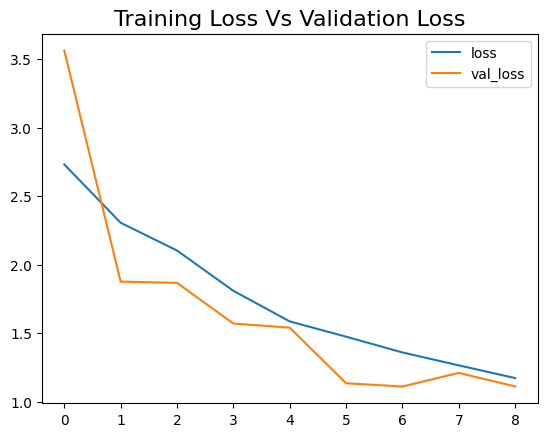

In [ ]:
metrics_model_11[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

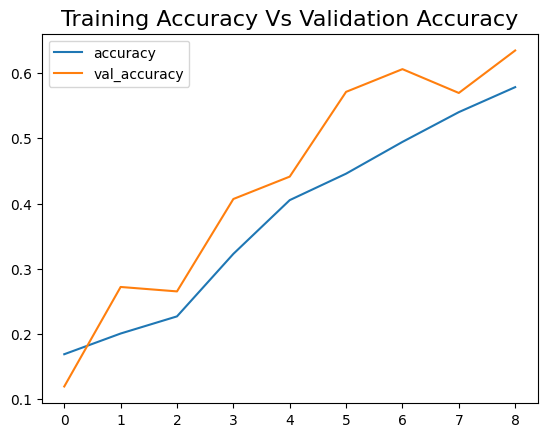

In [ ]:
metrics_model_11[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Data augmentation (lower) - model 12



### Generate augmented images

In [ ]:
# data augmentation with random transformations (rotation, shifts, zoom, flip, shear)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  # Reduce rotation
    width_shift_range=0.1,  # Reduce width shift
    height_shift_range=0.1,  # Reduce height shift
    shear_range=0.1,  # Reduce shear
    zoom_range=0.1,  # Reduce zoom
    horizontal_flip=True,  # Keep horizontal flip
    fill_mode='nearest'
)

datagen.fit(x_train_all)

### Specify model

In [ ]:


model_12 = Sequential(vgg.layers) # same as model 9


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers + dropout

model_12.add(Flatten())
model_12.add(Dense(1024,  activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.5)) # discard 50% of neurons
model_12.add(Dense(512,  activation='relu'))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.5)) # discard 50% of neurons
model_12.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_12.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
start = datetime.now()
history_model_12 = model_12.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size=64),
                    epochs=50, # number of epochs
                    validation_data=(x_val,y_val),
                    callbacks=[early_stop] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.5327 - loss: 1.4232 - val_accuracy: 0.6979 - val_loss: 0.9257
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.6712 - loss: 1.0053 - val_accuracy: 0.7069 - val_loss: 0.9355
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7215 - loss: 0.8763 - val_accuracy: 0.7716 - val_loss: 0.6820
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7645 - loss: 0.7319 - val_accuracy: 0.7642 - val_loss: 0.7372
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.7899 - loss: 0.6551 - val_accuracy: 0.8035 - val_loss: 0.5997
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8085 - loss: 0.6016 - val_accuracy: 0.7973 - val_loss: 0.6232
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8282 - loss: 0.5411 - val_accuracy: 0.8000 - val_loss: 0.6431
Total elapsed time :  0:03:16.228897


### Checking model training metrics

In [ ]:
metrics_model_12 = pd.DataFrame(model_12.history.history)
metrics_model_12

,accuracy,loss,val_accuracy,val_loss
0,0.596750,1.216773,0.6979,0.925662
1,0.684325,0.972460,0.7069,0.935512
2,0.732000,0.835807,0.7716,0.682035
3,0.768600,0.724591,0.7642,0.737224
4,0.794750,0.648303,0.8035,0.599655
5,0.810800,0.596211,0.7973,0.623190
6,0.827175,0.548088,0.8000,0.643121


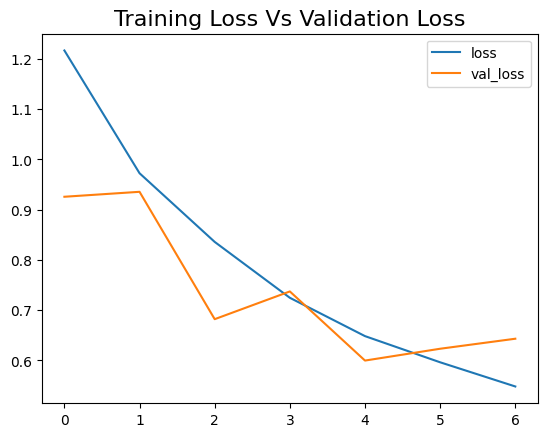

In [ ]:
metrics_model_12[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

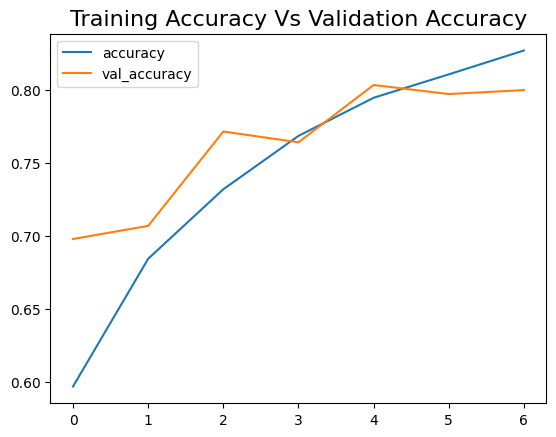

In [ ]:
metrics_model_12[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Data augmentation (adaptive learning rate) - model 13



### Generate augmented images

### Specify model

In [ ]:


model_13 = Sequential(vgg.layers) # same as model 9


# Flatten and add dense layers + batch normalisation +  trimmed fully connected layers + dropout

model_13.add(Flatten())
model_13.add(Dense(1024,  activation='relu'))
model_13.add(BatchNormalization())
model_13.add(Dropout(0.5)) # discard 50% of neurons
model_13.add(Dense(512,  activation='relu'))
model_13.add(BatchNormalization())
model_13.add(Dropout(0.5)) # discard 50% of neurons
model_13.add(Dense(10,  activation='softmax'))


# Compile with adjusted learning rate
from tensorflow.keras.optimizers import Adam
model_13.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4 # 0.0001; default is 0.001
        ),
    metrics=['accuracy']
)


### Fitting model

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

start = datetime.now()
history_model_13 = model_13.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size=64),
                    epochs=50, # number of epochs
                    validation_data=(x_val,y_val),
                    callbacks=[lr_scheduler] # early stopping rule
                    )

# print model training time
duration = datetime.now() - start
print('Total elapsed time : ',duration)
buzzer()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7617 - loss: 0.8013 - val_accuracy: 0.8214 - val_loss: 0.5827 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8320 - loss: 0.5510 - val_accuracy: 0.8485 - val_loss: 0.4946 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8432 - loss: 0.4963 - val_accuracy: 0.8566 - val_loss: 0.4456 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8600 - loss: 0.4582 - val_accuracy: 0.8369 - val_loss: 0.5417 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8661 - loss: 0.4302 - val_accuracy: 0.8657 - val_loss: 0.4409 - learning_rate: 1.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8710 - loss: 0.4006 - val_accuracy: 0.8565 - val_loss: 0.4595 - learning_rate: 1.0000e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accurac

### Checking model training metrics

In [ ]:
metrics_model_13 = pd.DataFrame(model_13.history.history)
metrics_model_13

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.807000,0.647473,0.8214,0.582718,1.000000e-04
1,0.833400,0.548178,0.8485,0.494560,1.000000e-04
2,0.846200,0.492141,0.8566,0.445649,1.000000e-04
3,0.856050,0.466268,0.8369,0.541673,1.000000e-04
4,0.865125,0.435057,0.8657,0.440912,1.000000e-04
5,0.870100,0.407805,0.8565,0.459536,1.000000e-04
6,0.883350,0.380275,0.8586,0.475468,1.000000e-04
7,0.886750,0.364836,0.8625,0.453232,1.000000e-04
8,0.908550,0.291687,0.8674,0.449856,5.000000e-05
9,0.916400,0.266891,0.8836,0.392896,5.000000e-05


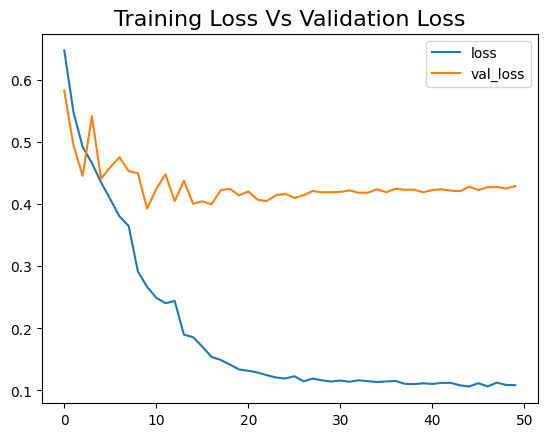

In [ ]:
metrics_model_13[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

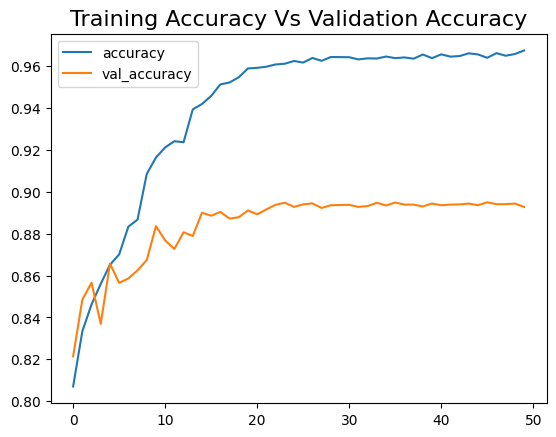

In [ ]:
metrics_model_13[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

# Assessing model performance on test data



## Fitting model on test set

In [ ]:
model = model_13

model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.4736


[0.4791160523891449, 0.8835999965667725]

## Classification report and confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1000
           1       0.93      0.95      0.94      1000
           2       0.88      0.84      0.86      1000
           3       0.78      0.73      0.76      1000
           4       0.89      0.86      0.87      1000
           5       0.85      0.77      0.80      1000
           6       0.86      0.95      0.90      1000
           7       0.88      0.93      0.90      1000
           8       0.95      0.94      0.95      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



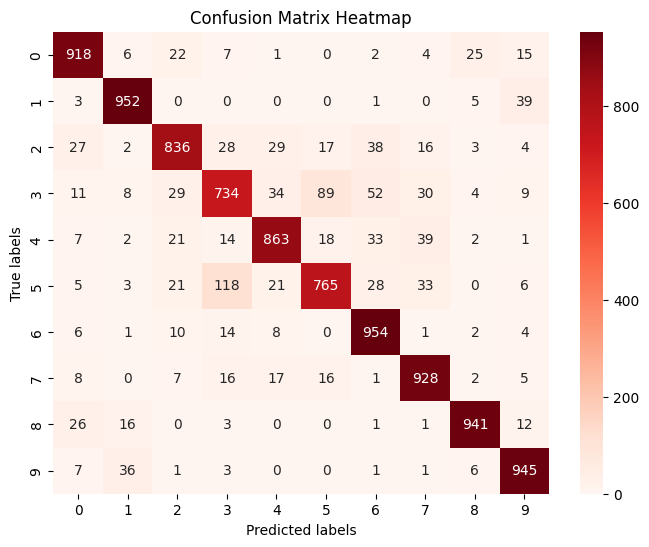

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test,predictions)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Reds',
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()